# 필요한 모듈 불러오기

In [1]:
import pandas as pd
import numpy as np

import tensorflow as tf
import re

import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

from konlpy.tag import Mecab
from collections import Counter

# 데이터 불러오기

In [2]:
train_data = pd.read_table('~/aiffel/sentiment_classification/data/ratings_train.txt')
test_data = pd.read_table('~/aiffel/sentiment_classification/data/ratings_test.txt')

train_data.head()

,id,document,label
0,9976970,아 더빙.. 진짜 짜증나네요 목소리,0
1,3819312,흠...포스터보고 초딩영화줄....오버연기조차 가볍지 않구나,1
2,10265843,너무재밓었다그래서보는것을추천한다,0
3,9045019,교도소 이야기구먼 ..솔직히 재미는 없다..평점 조정,0
4,6483659,사이몬페그의 익살스런 연기가 돋보였던 영화!스파이더맨에서 늙어보이기만 했던 커스틴 ...,1


In [3]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150000 entries, 0 to 149999
Data columns (total 3 columns):
 #   Column    Non-Null Count   Dtype 
---  ------    --------------   ----- 
 0   id        150000 non-null  int64 
 1   document  149995 non-null  object
 2   label     150000 non-null  int64 
dtypes: int64(2), object(1)
memory usage: 3.4+ MB


# 데이터 로더 구성

In [4]:
''''tokenizer = Mecab()
stopwords = ['의','가','이','은','들','는','좀','잘','걍','과','도','를','으로','자','에','와','한','하다']

# 정규표현식을 사용하여 특수기호와 자음, 모음을 제거하는 불용어 제거 함수 생성 
def cleasing(text): 
    repl ='' 
    pattern = '([ㄱ-ㅎㅏ-ㅣ]+)' # 자음, 모음 제거 
    text = re.sub(pattern= pattern, repl=repl, string=str(text)) 
    pattern = '[^가-히\s]' # 특수기호 제거 
    text = re.sub(pattern= pattern, repl=repl, string=str(text)) 
    return text

def load_data(train_data, test_data):
    # 중복 데이터 삭제
    train_data.drop_duplicates(subset='document', inplace=True)
    test_data.drop_duplicates(subset='document', inplace=True)
    
    # 결측치 제거
    train_data = train_data[train_data['document'].notnull()]
    test_data = test_data[test_data['document'].notnull()]
    
    #토큰화 이전 clean 함수 적용
    train_data['document'] = train_data['document'].map(lambda x : cleasing(x))
    test_data['document'] = test_data['document'].map(lambda x : cleasing(x))
    
    #토큰화 - 형태소 기준 분리
    for sentence in train_data['document']:
        tokenizer.morphs(sentence)
    
    for sentence in test_data['document']:
        tokenizer.morphs(sentence)
        
    
    #stopwords 제거
    for sentence in train_data['document']:
        for word in sentence:
            if word not in sentence:
                yield word
            
            
    for sentence in test_data['document']:
        for word in sentence:
            if word not in stopwords:
                yield word
                
            

    #word_to_index 구성
    all_tokens = train_data['document'] + test_data['document']
    all_tokens = list(set(all_tokens))
    word_to_index = {}
    for i, t in enumerate(all_tokens):
        word_to_index[t] = i

    return train_data['document'], train_data['label'], test_data['document'], test_data['label'], word_to_index   



X_train, y_train, X_test, y_test, word_to_index = load_data(train_data, test_data)'''

"'tokenizer = Mecab()\nstopwords = ['의','가','이','은','들','는','좀','잘','걍','과','도','를','으로','자','에','와','한','하다']\n\n# 정규표현식을 사용하여 특수기호와 자음, 모음을 제거하는 불용어 제거 함수 생성 \ndef cleasing(text): \n    repl ='' \n    pattern = '([ㄱ-ㅎㅏ-ㅣ]+)' # 자음, 모음 제거 \n    text = re.sub(pattern= pattern, repl=repl, string=str(text)) \n    pattern = '[^가-히\\s]' # 특수기호 제거 \n    text = re.sub(pattern= pattern, repl=repl, string=str(text)) \n    return text\n\ndef load_data(train_data, test_data):\n    # 중복 데이터 삭제\n    train_data.drop_duplicates(subset='document', inplace=True)\n    test_data.drop_duplicates(subset='document', inplace=True)\n    \n    # 결측치 제거\n    train_data = train_data[train_data['document'].notnull()]\n    test_data = test_data[test_data['document'].notnull()]\n    \n    #토큰화 이전 clean 함수 적용\n    train_data['document'] = train_data['document'].map(lambda x : cleasing(x))\n    test_data['document'] = test_data['document'].map(lambda x : cleasing(x))\n    \n    #토큰화 - 형태소 기준 분리\n    for sentence in t

---------------------------------------

예시코드를 보지 않고 load_data 함수를 작성하고자 했지만 원인을 파악하지 못한 에러가 계속되어서 

예시코드의 함수를 해석하는 방식으로 진행했다.

In [5]:
tokenizer = Mecab()    #토큰화 함수

#불용어 리스트
stopwords = ['의','가','이','은','들','는','좀','잘','걍','과','도','를','으로','자','에','와','한','하다']

#정규 표현식을 활용한 불용어 제거 함수 추가
def cleasing(text): 
    repl ='' 
    pattern = '([ㄱ-ㅎㅏ-ㅣ]+)' # 자음, 모음 제거 
    text = re.sub(pattern= pattern, repl=repl, string=str(text)) 
    pattern = '[^가-히\s]' # 특수기호 제거 
    text = re.sub(pattern= pattern, repl=repl, string=str(text)) 
    return text

def load_data(train_data, test_data, num_words=10000):
    train_data.drop_duplicates(subset=['document'], inplace=True)   #데이터 중복 제거
    train_data = train_data.dropna(how = 'any')    # 결측치 제거
    test_data.drop_duplicates(subset=['document'], inplace=True)    #데이터 중복 제거
    test_data = test_data.dropna(how = 'any')      # 결측치 제거
    
    X_train = []
    for sentence in train_data['document']:
        temp_X = tokenizer.morphs(sentence) # 토큰화
        temp_X = [word for word in temp_X if not word in stopwords] # 불용어 제거
        X_train.append(temp_X)  #트레인 데이터로 만든 토큰들을 X_train 리스트에 추가

    X_test = []
    for sentence in test_data['document']:
        temp_X = tokenizer.morphs(sentence) # 토큰화
        temp_X = [word for word in temp_X if not word in stopwords] # 불용어 제거
        X_test.append(temp_X)  #테스트 데이터로 만든 토큰들을 X_train 리스트에 추가
    
    words = np.concatenate(X_train).tolist()  
    words = list(map(cleasing, words))
    words_list = []
    for w in words:
        if len(w) >= 2:   #2글자 이상의 단어만 토큰화
            words_list.append(w)
    
    counter = Counter(words_list)   # words 안에 있는 요소들의 개수를 세어주는 함수 
    counter = counter.most_common(10000-4)   # 가장 많이 나오는 (10000-4)개 단어
    vocab = ['', '', '', ''] + [key for key, _ in counter]
    word_to_index = {word:index for index, word in enumerate(vocab)}   # vocab에 있는 단어와 인덱스의 키, 값 위치를 바꿔줌
    
    def wordlist_to_indexlist(wordlist):
        return [word_to_index[word] if word in word_to_index else word_to_index[''] for word in wordlist]
        
    X_train = list(map(wordlist_to_indexlist, X_train))
    X_test = list(map(wordlist_to_indexlist, X_test))
        
    return X_train, np.array(list(train_data['label'])), X_test, np.array(list(test_data['label'])), word_to_index
    
X_train, y_train, X_test, y_test, word_to_index = load_data(train_data, test_data) 

### word_to_index를 index_to_word 로 변환

In [7]:
index_to_word = {index:word for word, index in word_to_index.items()}

### word_to_index 에서 값으로 키를 반환하는 함수
- word_to_index에서 키 0,1,2에 해당하는 value가 있는지 확인하기 위해 딕셔너리의 value로 key를 반환하는 함수 생성


In [8]:
def get_key(val):
    for key, value in word_to_index.items():
         if val == value:
                return key
 
    return "There is no such Key"
   
print(get_key(0))
print(get_key(1))
print(get_key(2))

# value 0, 1, 2 에 해당하는 key는 없음
# key 3은 '' 아무것도 없음

There is no such Key
There is no such Key
There is no such Key


### word_to_index, index_to_word 보정
- word_to_index의 0, 1, 2 에 해당하는 key를 지정해주고,
- 공백에 해당하는 3에 UNUSED를 지정해줌
- 이를 index_to_word에도 반영

In [9]:
word_to_index["<PAD>"] = 0
word_to_index["<BOS>"] = 1
word_to_index["<UNK>"] = 2
word_to_index["UNUSED"] = 3

index_to_word = {index:word for word, index in word_to_index.items()}

In [10]:
print(index_to_word[1])
print(word_to_index['영화'])
print(index_to_word[4])

<BOS>
4
영화


### encode된 리뷰가 잘 decode 되는 지 확인

In [11]:
# 문장 1개를 활용할 딕셔너리와 함께 주면, 단어 인덱스 리스트 벡터로 변환해 주는 함수
# 모든 문장은 <BOS>로 시작

# 숫자 벡터로 encode된 문장을 원래대로 decode하는 함수
def get_decoded_sentence(encoded_sentence, index_to_word):
    return ' '.join(index_to_word[index] if index in index_to_word else '<UNK>' for index in encoded_sentence[1:])  #[1:]를 통해 <BOS>를 제외

In [12]:
print(get_decoded_sentence(X_train[0], index_to_word))
print('라벨 : ', y_train[0]) #1번째 리뷰 데이터의 라벨

UNUSED UNUSED UNUSED UNUSED 진짜 짜증 UNUSED 네요 목소리
라벨 :  0


# 모델 구성을 위한 데이터 분석 및 가공

## 데이터셋 내 문장 길이 분포

In [13]:
print(X_train[0])  # 1번째 리뷰데이터
print('라벨: ', y_train[0])  # 1번째 리뷰데이터의 라벨
print('1번째 리뷰 문장 길이: ', len(X_train[0]))

# load_data 함수를 거치면서 encode 됨 

[3, 3, 3, 3, 3, 11, 107, 3, 8, 449]
라벨:  0
1번째 리뷰 문장 길이:  10


### 문장의 길이를 원소로 하는 리스트 생성

In [103]:
len_X_train = []
for i in range(len(X_train)):
    len_X_train.append(len(X_train[i]))

In [15]:
#길이의 분포 확인 -> 딕셔너리 형태
counter = Counter(len_X_train)
counter

Counter({10: 7724,
         17: 4695,
         3: 3648,
         13: 6220,
         23: 2017,
         24: 1684,
         43: 436,
         9: 8161,
         21: 2801,
         6: 8698,
         22: 2375,
         15: 5570,
         25: 1497,
         28: 1039,
         16: 5142,
         19: 3619,
         12: 6679,
         53: 420,
         8: 8825,
         30: 918,
         2: 1873,
         20: 3248,
         26: 1275,
         7: 9324,
         5: 7152,
         35: 694,
         18: 4159,
         40: 533,
         68: 76,
         14: 5939,
         1: 706,
         44: 436,
         11: 7162,
         38: 576,
         55: 438,
         32: 814,
         54: 454,
         4: 5218,
         27: 1130,
         41: 538,
         51: 419,
         49: 393,
         59: 330,
         36: 579,
         63: 218,
         46: 452,
         67: 96,
         37: 623,
         42: 465,
         74: 12,
         69: 72,
         39: 529,
         47: 440,
         57: 427,
         34: 7

### 데이터셋 내의 문장의 길이 분포 시각화

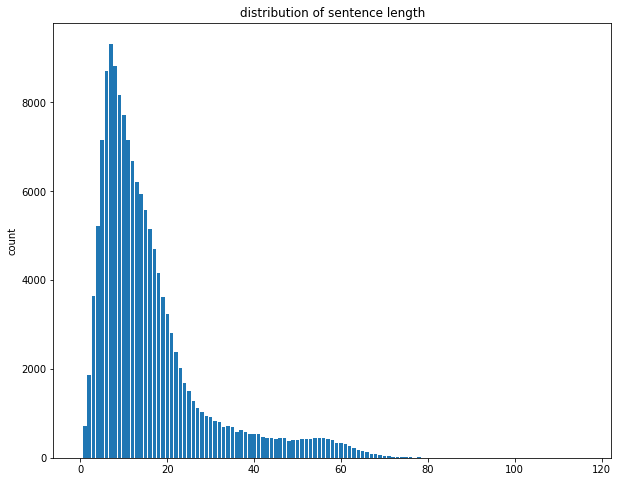

In [16]:
plt.figure(figsize=(10, 8))
plt.bar(x=counter.keys(), height=counter.values())
plt.ylabel('count')
plt.title('distribution of sentence length');

20이하의 문장 길이에 몰려있는 것을 확인했다.

## 적절한 최대 문장 길이 지정
- 문장 최대 길이 maxlen의 값 설정도 전체 모델 성능에 영향
### 적절한 값을 찾기 위해 데이터셋 분포를 확인

In [17]:
total_data_text = list(X_train) + list(X_test)

#텍스트 데이터 문장길이를 담은 리스트를 생성한 후
num_tokens = [len(tokens) for tokens in total_data_text]
#어레이로 변경
num_tokens = np.array(num_tokens)

#문장 길이의 평균값, 최대값, 표준편차를 계산
print('문장길이 평균 : ', np.mean(num_tokens))
print('문장길이 최대 : ', np.max(num_tokens))
print('문장길이 표준편차 : ', np.std(num_tokens))

#예를 들어, 최대 길이를 (평균 + 2*표준편차)로 한다면,
max_tokens = np.mean(num_tokens) + 2 * np.std(num_tokens)
maxlen = int(max_tokens) # max_tokens가 실수값일 수도 있으니까 int로 변환
print('pad_sequences maxlen : ', maxlen)
print('전체 문장의 {}%가 maxlen 설정값 이내에 포함.'.format(np.sum((num_tokens < max_tokens) / len(num_tokens))))

문장길이 평균 :  15.96940191154864
문장길이 최대 :  116
문장길이 표준편차 :  12.843571191092
pad_sequences maxlen :  41
전체 문장의 0.9342988343341577%가 maxlen 설정값 이내에 포함.


## keras.preprocessing.sequence.pad_sequences 을 활용한 패딩 추가

RNN은 입력데이터가 순차적으로 처리된다. 

즉, 가장 마지막 입력이 최종 state 값에 가장 영향을 많이 미치게 되므로,

마지막 입력이 무의미한 padding으로 채워지는 것은 비효율적이다.

따라서 padding 방식은 'pre'로 선택했다.

In [18]:
X_train = tf.keras.preprocessing.sequence.pad_sequences(X_train,
                                                       value = word_to_index["<PAD>"],
                                                       padding= 'pre',
                                                       maxlen = maxlen)

X_test = tf.keras.preprocessing.sequence.pad_sequences(X_test,
                                                       value = word_to_index["<PAD>"],
                                                       padding= 'pre',
                                                       maxlen = maxlen)

# 모델 및 validation set 구성

# 순방향 RNN

In [19]:
vocab_size = 10000   #어휘 사전의 크기 (10,000개의 단어)
word_vector_dim = 16    #워드 벡터 차원 수(변경 가능한 하이퍼 파라미터)

model_rnn = tf.keras.Sequential()
model_rnn.add(tf.keras.layers.Embedding(vocab_size, word_vector_dim, input_shape=(None,), mask_zero=True))
model_rnn.add(tf.keras.layers.LSTM(8))
model_rnn.add(tf.keras.layers.Dense(1, activation='sigmoid'))

model_rnn.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, None, 16)          160000    
_________________________________________________________________
lstm (LSTM)                  (None, 8)                 800       
_________________________________________________________________
dense (Dense)                (None, 1)                 9         
Total params: 160,809
Trainable params: 160,809
Non-trainable params: 0
_________________________________________________________________


## Validation Set 생성

아래 링크들을 통해 통상적으로 train : validation : test = 6 : 2 : 2 비율을 사용한다는 것과

데이터가 충분히 있을 경우 validation set의 크기를 줄이는 것이 모델 학습 측면에서 더 이롭다는 것을 알게되었다.

train data 146,182개, test data 49,157개로 test data의 개수가 train data의 약 33.62%이다.

따라서 validation의 개수를 test 개수에 맞추기보다 train data의 20%에 해당하는 만큼 할당하고자 한다. 


**참고 링크 :** 

https://modern-manual.tistory.com/19

https://brunch.co.kr/@coolmindory/31


- validation set 생성을 위해 X_train의 shape 확인

In [20]:
X_train.shape

(146182, 41)

In [21]:
146182 * 0.2

29236.4

In [22]:
#validation set 29,236건 분리
X_val = X_train[:29236]
y_val = y_train[:29236]

#validation set을 제외한 나머지 116,946건
partial_X_train = X_train[29236:]
partial_y_train = y_train[29236:]

print(partial_X_train.shape)
print(partial_y_train.shape)

(116946, 41)
(116946,)


# 모델 학습

In [23]:
model_rnn.compile(optimizer='adam',
             loss = 'binary_crossentropy',
             metrics=['accuracy'])

epochs = 10

history_rnn = model_rnn.fit(partial_X_train,
                   partial_y_train,
                   epochs=epochs,
                   batch_size=512,
                   validation_data=(X_val,y_val),
                   verbose=1)
# model.fit 과정 중의 train/validation loss, accuracy 등이 매 epoch마다 history 변수에 저장

Epoch 1/10
229/229 [==============================] - 26s 96ms/step - loss: 0.5666 - accuracy: 0.7354 - val_loss: 0.4473 - val_accuracy: 0.7995
Epoch 2/10
229/229 [==============================] - 21s 92ms/step - loss: 0.4127 - accuracy: 0.8158 - val_loss: 0.4096 - val_accuracy: 0.8120
Epoch 3/10
229/229 [==============================] - 21s 92ms/step - loss: 0.3806 - accuracy: 0.8305 - val_loss: 0.4040 - val_accuracy: 0.8114
Epoch 4/10
229/229 [==============================] - 21s 93ms/step - loss: 0.3660 - accuracy: 0.8382 - val_loss: 0.4043 - val_accuracy: 0.8118
Epoch 5/10
229/229 [==============================] - 22s 94ms/step - loss: 0.3557 - accuracy: 0.8420 - val_loss: 0.4074 - val_accuracy: 0.8124
Epoch 6/10
229/229 [==============================] - 21s 93ms/step - loss: 0.3469 - accuracy: 0.8471 - val_loss: 0.4107 - val_accuracy: 0.8120
Epoch 7/10
229/229 [==============================] - 21s 92ms/step - loss: 0.3378 - accuracy: 0.8516 - val_loss: 0.4139 - val_accuracy:

In [34]:
print(max(history_rnn.history['val_accuracy']))

0.8123546242713928

# Test Set 평가

In [30]:
results_rnn = model_rnn.evaluate(X_test, y_test, verbose=2)

print(results_rnn)

1537/1537 - 12s - loss: 0.4353 - accuracy: 0.8050
[0.4353088438510895, 0.804992139339447]


validation set에서의 성능보다 떨어지는 test set에서의 성능이 도출되었다.

# Loss, Accuracy 그래프 시각화

In [35]:
history_dict_rnn = history_rnn.history
print(history_dict_rnn.keys())   #epoch에 따른 그래프를 그려볼 수 있는 항목들

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


## Loss 시각화

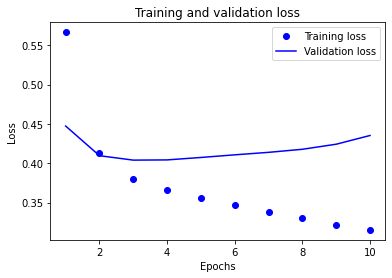

In [36]:
import matplotlib.pyplot as plt

acc = history_dict_rnn['accuracy']
val_acc = history_dict_rnn['val_accuracy']
loss = history_dict_rnn['loss']
val_loss = history_dict_rnn['val_loss']

epochs = range(1, len(acc) + 1)

plt.plot(epochs, loss, 'bo', label = "Training loss")
                      # 파란색 점
plt.plot(epochs, val_loss, 'b', label = "Validation loss")
                      # 파란 실선
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

# 6번째 epoch 부터 validation loss 증가 

## Accuracy 시각화

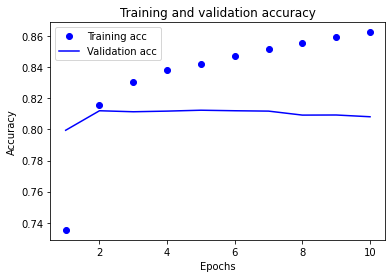

In [37]:
plt.clf()  #그림 초기화

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.show()

# 학습된 Embedding 레이어 분석

In [38]:
embedding_layer_rnn = model_rnn.layers[0]
weights_rnn = embedding_layer_rnn.get_weights()[0]
print(weights_rnn.shape)

# shape : (vocab_size, embedding_dim)

(10000, 16)


### 학습한 Embedding 파라미터를 파일에 써서 저장

In [39]:
word2vec_file_path_rnn = 'sentiment_classification/nsmc_RNN_parameters.txt'
f = open(word2vec_file_path_rnn, 'w')
f.write('{} {}\n'.format(vocab_size-4, word_vector_dim))  #몇 개의 벡터를 얼마 사이즈로 기재할 지 타이틀로 씀

#단어 개수(특수문자 4개는 제외)만큼의 워드 벡터를 파일에 기록
vectors_rnn = model_rnn.get_weights()[0]
for i in range(4, vocab_size):
    f.write('{} {}\n'.format(index_to_word[i], ' '.join(map(str, list(vectors_rnn[i, :])))))
f.close()

In [40]:
from gensim.models.keyedvectors import Word2VecKeyedVectors

word_vectors_rnn = Word2VecKeyedVectors.load_word2vec_format(word2vec_file_path_rnn, binary=False)
#word_vectors에 원하는 단어를 넣으면 vector값 반환

### 유사도 계산

In [41]:
word_vectors_rnn.similar_by_word('재밌')

[('익스트림', 0.971927285194397),
 ('금성무', 0.9710139036178589),
 ('어우러진', 0.9665889143943787),
 ('완존', 0.965834379196167),
 ('애틋', 0.9644466042518616),
 ('후련', 0.9643982648849487),
 ('울린다', 0.9635193347930908),
 ('데뷔작', 0.9579452276229858),
 ('역작', 0.9576860666275024),
 ('봣음', 0.9576651453971863)]

형편없는 정도는 아니지만 딱 들어맞는다는 느낌도 없다.

# 한국어 Word2Vec 임베딩 활용하여 성능 개선
- 데이터를 ko.bin 데이터를 다운받기 위해 gensim 버전 3.4.0으로 다운그레이드

In [42]:
import os
from gensim.models import Word2Vec 

word2vec_path = 'sentiment_classification/data/ko.bin'
word2vec = Word2Vec.load(word2vec_path)

In [43]:
word2vec.similar_by_word('재밌')

/tmp/ipykernel_219/4066611126.py:1: DeprecationWarning: Call to deprecated `similar_by_word` (Method will be removed in 4.0.0, use self.wv.similar_by_word() instead).
  word2vec.similar_by_word('재밌')


[('재미있', 0.7603887915611267),
 ('웃기', 0.7365726828575134),
 ('멋지', 0.657281756401062),
 ('슬프', 0.6381862163543701),
 ('안타깝', 0.6331009864807129),
 ('즐겁', 0.6227831840515137),
 ('맛있', 0.6146109104156494),
 ('우습', 0.6106981039047241),
 ('생각나', 0.6095916032791138),
 ('시끄럽', 0.6063516139984131)]

이전의 유사도 계산보다는 훨씬 잘 맞는 듯 하다.

In [44]:
word_vector_dim = 200 # word2vec 과 차원을 맞춰주기 위해 변경
embedding_matrix = np.random.rand(vocab_size, word_vector_dim)

# embedding_matrix에 Word2Vec 워드 벡터를 단어 하나씩마다 차례차례 카피
for i in range(4,vocab_size):
    if index_to_word[i] in word2vec:
        embedding_matrix[i] = word2vec[index_to_word[i]]

/tmp/ipykernel_219/3762001651.py:6: DeprecationWarning: Call to deprecated `__contains__` (Method will be removed in 4.0.0, use self.wv.__contains__() instead).
  if index_to_word[i] in word2vec:
/tmp/ipykernel_219/3762001651.py:7: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  embedding_matrix[i] = word2vec[index_to_word[i]]


In [45]:
from tensorflow.keras.initializers import Constant

vocab_size = 10000
word_vector_dim = 200

model_rnn_w = tf.keras.Sequential()
model_rnn_w.add(tf.keras.layers.Embedding(vocab_size, word_vector_dim, 
                                    embeddings_initializer=Constant(embedding_matrix),  # 카피한 임베딩을 여기서 활용
                                    input_length=maxlen, 
                                    trainable=True)) 
model_rnn_w.add(tf.keras.layers.LSTM(8))
model_rnn_w.add(tf.keras.layers.Dense(1, activation='sigmoid'))

model_rnn_w.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_1 (Embedding)      (None, 41, 200)           2000000   
_________________________________________________________________
lstm_1 (LSTM)                (None, 8)                 6688      
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 9         
Total params: 2,006,697
Trainable params: 2,006,697
Non-trainable params: 0
_________________________________________________________________


In [46]:
model_rnn_w.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])
              
epochs= 10  # 몇 epoch를 훈련하면 좋을지 결과를 보면서 바꾸어 봅시다. 

model_rnn_w.fit(partial_X_train,
                partial_y_train,
                epochs=epochs,
                batch_size=512,
                validation_data=(X_val, y_val),
                verbose=1)

Epoch 1/10
229/229 [==============================] - 13s 8ms/step - loss: 0.5386 - accuracy: 0.7170 - val_loss: 0.4393 - val_accuracy: 0.7915
Epoch 2/10
229/229 [==============================] - 1s 6ms/step - loss: 0.4115 - accuracy: 0.8077 - val_loss: 0.4068 - val_accuracy: 0.8076
Epoch 3/10
229/229 [==============================] - 1s 6ms/step - loss: 0.3779 - accuracy: 0.8272 - val_loss: 0.3983 - val_accuracy: 0.8126
Epoch 4/10
229/229 [==============================] - 1s 6ms/step - loss: 0.3587 - accuracy: 0.8380 - val_loss: 0.4029 - val_accuracy: 0.8113
Epoch 5/10
229/229 [==============================] - 1s 6ms/step - loss: 0.3454 - accuracy: 0.8449 - val_loss: 0.4028 - val_accuracy: 0.8132
Epoch 6/10
229/229 [==============================] - 1s 6ms/step - loss: 0.3329 - accuracy: 0.8511 - val_loss: 0.4055 - val_accuracy: 0.8144
Epoch 7/10
229/229 [==============================] - 1s 6ms/step - loss: 0.3225 - accuracy: 0.8561 - val_loss: 0.4220 - val_accuracy: 0.8069
Epoch

In [47]:
results_rnn_w = model_rnn_w.evaluate(X_test, y_test, verbose=1)

print(results_rnn_w)

1537/1537 [==============================] - 4s 2ms/step - loss: 0.4410 - accuracy: 0.8039
[0.44098028540611267, 0.8038529753684998]


오히려 성능이 저하되었다.

----------------------------------------------

## RNN-사전학습 임베딩 사용 모델 하이퍼 파라미터 튜닝

In [48]:
from tensorflow.keras.initializers import Constant

vocab_size = 10000
word_vector_dim = 200

model_rnn_w_h = tf.keras.Sequential()
model_rnn_w_h.add(tf.keras.layers.Embedding(vocab_size, word_vector_dim, 
                                    embeddings_initializer=Constant(embedding_matrix),  # 카피한 임베딩을 여기서 활용
                                    input_length=maxlen, 
                                    trainable=True)) 
model_rnn_w_h.add(tf.keras.layers.LSTM(128))
                                    # 8 -> 128
model_rnn_w_h.add(tf.keras.layers.Dense(1, activation='sigmoid'))

model_rnn_w_h.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_2 (Embedding)      (None, 41, 200)           2000000   
_________________________________________________________________
lstm_2 (LSTM)                (None, 128)               168448    
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 129       
Total params: 2,168,577
Trainable params: 2,168,577
Non-trainable params: 0
_________________________________________________________________


In [49]:
model_rnn_w_h.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])
              
epochs= 10  

model_rnn_w_h.fit(partial_X_train,
                  partial_y_train,
                  epochs=epochs,
                  batch_size=512,
                  validation_data=(X_val, y_val),
                  verbose=1)

Epoch 1/10
229/229 [==============================] - 5s 16ms/step - loss: 0.5237 - accuracy: 0.7275 - val_loss: 0.4343 - val_accuracy: 0.7910
Epoch 2/10
229/229 [==============================] - 3s 14ms/step - loss: 0.4050 - accuracy: 0.8092 - val_loss: 0.3937 - val_accuracy: 0.8136
Epoch 3/10
229/229 [==============================] - 3s 14ms/step - loss: 0.3666 - accuracy: 0.8307 - val_loss: 0.3895 - val_accuracy: 0.8193
Epoch 4/10
229/229 [==============================] - 3s 14ms/step - loss: 0.3445 - accuracy: 0.8431 - val_loss: 0.3910 - val_accuracy: 0.8163
Epoch 5/10
229/229 [==============================] - 3s 14ms/step - loss: 0.3272 - accuracy: 0.8518 - val_loss: 0.3957 - val_accuracy: 0.8189
Epoch 6/10
229/229 [==============================] - 3s 14ms/step - loss: 0.3102 - accuracy: 0.8605 - val_loss: 0.4017 - val_accuracy: 0.8156
Epoch 7/10
229/229 [==============================] - 3s 14ms/step - loss: 0.2912 - accuracy: 0.8693 - val_loss: 0.4309 - val_accuracy: 0.8138

In [51]:
results_rnn_w_h = model_rnn_w_h.evaluate(X_test, y_test, verbose=1)

print(results_rnn_w_h)

1537/1537 [==============================] - 4s 3ms/step - loss: 0.4871 - accuracy: 0.8065
[0.4870980978012085, 0.8065382242202759]


예상외로 큰 차이가 없다. 

## 역방향 RNN

## keras.preprocessing.sequence.pad_sequences 을 활용한 패딩 추가
역방향 RNN은 입력데이터가 순방향 RNN과는 반대로 처리된다.

즉, 맨 처음 입력이 최종 state 값에 가장 영향을 많이 미치게 되므로,

맨 처음 입력이 무의미한 padding으로 채워지는 것은 비효율적이다.

따라서 padding 방식은 'post'로 선택했다.

In [52]:
X_train = tf.keras.preprocessing.sequence.pad_sequences(X_train,
                                                       value = word_to_index["<PAD>"],
                                                       padding= 'post',
                                                       maxlen = maxlen)

X_test = tf.keras.preprocessing.sequence.pad_sequences(X_test,
                                                       value = word_to_index["<PAD>"],
                                                       padding= 'post',
                                                       maxlen = maxlen)

## 모델 설계 및 학습

In [53]:
model_brnn = tf.keras.Sequential([
    tf.keras.layers.Embedding(vocab_size, word_vector_dim, mask_zero=True),
    tf.keras.layers.LSTM(8, go_backwards= True),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

In [54]:
model_brnn.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [55]:
epochs = 10

history_brnn = model_brnn.fit(partial_X_train,
                   partial_y_train,
                   epochs=epochs,
                   batch_size=512,
                   validation_data=(X_val,y_val),
                   verbose=1)

Epoch 1/10
229/229 [==============================] - 27s 103ms/step - loss: 0.5093 - accuracy: 0.7670 - val_loss: 0.4205 - val_accuracy: 0.8088
Epoch 2/10
229/229 [==============================] - 23s 99ms/step - loss: 0.3901 - accuracy: 0.8241 - val_loss: 0.4060 - val_accuracy: 0.8131
Epoch 3/10
229/229 [==============================] - 23s 99ms/step - loss: 0.3645 - accuracy: 0.8360 - val_loss: 0.4086 - val_accuracy: 0.8109
Epoch 4/10
229/229 [==============================] - 23s 99ms/step - loss: 0.3480 - accuracy: 0.8432 - val_loss: 0.4156 - val_accuracy: 0.8106
Epoch 5/10
229/229 [==============================] - 22s 98ms/step - loss: 0.3341 - accuracy: 0.8493 - val_loss: 0.4184 - val_accuracy: 0.8083
Epoch 6/10
229/229 [==============================] - 23s 98ms/step - loss: 0.3219 - accuracy: 0.8554 - val_loss: 0.4317 - val_accuracy: 0.8076
Epoch 7/10
229/229 [==============================] - 23s 99ms/step - loss: 0.3107 - accuracy: 0.8605 - val_loss: 0.4396 - val_accuracy

In [56]:
print(max(history_brnn.history['val_accuracy']))

0.813072919845581


## Test set 평가

In [57]:
results_brnn = model_brnn.evaluate(X_test, y_test, verbose=2)

print(results_brnn)

1537/1537 - 13s - loss: 0.4699 - accuracy: 0.8021
[0.4698570966720581, 0.8021441698074341]


validation set에서는 순방향 RNN보다 높은 성능을 보였지만, test set에서는 순방향 RNN과 비슷한 결과가 도출되었다.

# Loss, Accuracy 그래프 시각화

In [58]:
history_dict_brnn = history_brnn.history
print(history_dict_brnn.keys())   #epoch에 따른 그래프를 그려볼 수 있는 항목들

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


## Loss

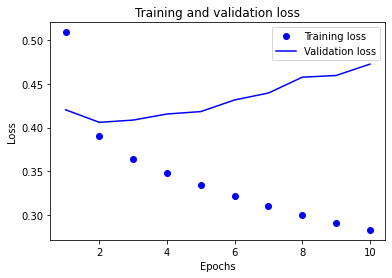

In [99]:
import matplotlib.pyplot as plt

acc = history_dict_brnn['accuracy']
val_acc = history_dict_brnn['val_accuracy']
loss = history_dict_brnn['loss']
val_loss = history_dict_brnn['val_loss']

epochs = range(1, len(acc) + 1)

plt.plot(epochs, loss, 'bo', label = "Training loss")
                      # 파란색 점
plt.plot(epochs, val_loss, 'b', label = "Validation loss")
                      # 파란 실선
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show() 
#두 번째 epoch부터 과적합이 진행되었다.

## Accuracy 시각화

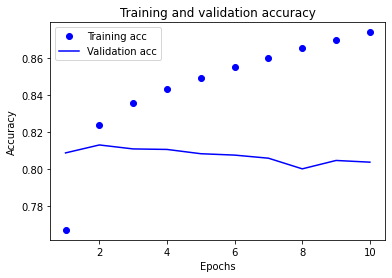

In [100]:
plt.clf()  #그림 초기화

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.show()

## 학습된 Embedding layer 분석 

In [101]:
embedding_layer_brnn = model_brnn.layers[0]
weights_brnn = embedding_layer_brnn.get_weights()[0]
print(weights_brnn.shape)

# shape : (vocab_size, embedding_dim)

(10000, 200)


### 학습한 Embedding 파라미터를 파일에 써서 저장

In [62]:
word2vec_file_path_brnn = 'sentiment_classification/nsmc_BRNN_parameters.txt'
f = open(word2vec_file_path_brnn, 'w')
f.write('{} {}\n'.format(vocab_size-4, word_vector_dim))  #몇 개의 벡터를 얼마 사이즈로 기재할 지 타이틀로 씀

#단어 개수(특수문자 4개는 제외)만큼의 워드 벡터를 파일에 기록
vectors_brnn = model_brnn.get_weights()[0]
for i in range(4, vocab_size):
    f.write('{} {}\n'.format(index_to_word[i], ' '.join(map(str, list(vectors_brnn[i, :])))))
f.close()

In [63]:
from gensim.models.keyedvectors import Word2VecKeyedVectors

word_vectors_brnn = Word2VecKeyedVectors.load_word2vec_format(word2vec_file_path_brnn, binary=False)
#word_vectors에 원하는 단어를 넣으면 vector값 반환
vector_brnn = word_vectors_brnn['재밌']
vector_brnn

array([ 0.00626648,  0.10468561, -0.2579023 ,  0.10939656,  0.15016794,
        0.11464047, -0.02888204, -0.18419757,  0.01463797,  0.06802191,
        0.11791212, -0.17962103, -0.15224257, -0.03075467,  0.10499847,
       -0.17452179, -0.11050119,  0.11368   ,  0.12422573,  0.1816918 ,
        0.15500213, -0.14706579, -0.128005  ,  0.04155134,  0.14324304,
        0.21987648, -0.08189843, -0.14985126,  0.07837569, -0.14735238,
       -0.1357173 ,  0.0550045 , -0.14634424, -0.19167444,  0.06418525,
       -0.08277954, -0.101356  ,  0.16068235,  0.02864521, -0.03481765,
       -0.11073373,  0.17016745, -0.14679202, -0.13470735, -0.08140797,
        0.01983568,  0.22049873,  0.04860391,  0.22713391, -0.00399628,
        0.05937281,  0.0288044 ,  0.16887453, -0.20893864,  0.16610214,
        0.05615139, -0.19122268, -0.1385964 ,  0.06594085, -0.09987148,
        0.07322354,  0.01673129, -0.1068214 ,  0.23237011,  0.11046492,
        0.12795019, -0.06969044, -0.04742424,  0.1405536 ,  0.18

### 유사도 계산

In [64]:
word_vectors_brnn.similar_by_word('재밌')

[('재미있', 0.9256278276443481),
 ('즐거웠', 0.8764846324920654),
 ('강렬', 0.8610167503356934),
 ('흥미진진', 0.858970046043396),
 ('센세이션', 0.8577584624290466),
 ('귀여운', 0.8555523157119751),
 ('드럼', 0.8545413017272949),
 ('감탄', 0.8540531396865845),
 ('경이', 0.8518862724304199),
 ('오즈', 0.851150631904602)]

비교적 유사한 토큰들이 도출되었다. 

# 한국어 Word2Vec 임베딩 활용하여 성능 개선

In [65]:
vocab_size = 10000
word_vector_dim = 200

model_brnn_w = tf.keras.Sequential()
model_brnn_w.add(tf.keras.layers.Embedding(vocab_size, word_vector_dim, 
                                    embeddings_initializer=Constant(embedding_matrix),  # 카피한 임베딩을 여기서 활용
                                    input_length=maxlen, trainable=True)) 
model_brnn_w.add(tf.keras.layers.LSTM(8, go_backwards= True))
model_brnn_w.add(tf.keras.layers.Dense(1, activation='sigmoid'))

model_brnn_w.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_4 (Embedding)      (None, 41, 200)           2000000   
_________________________________________________________________
lstm_4 (LSTM)                (None, 8)                 6688      
_________________________________________________________________
dense_4 (Dense)              (None, 1)                 9         
Total params: 2,006,697
Trainable params: 2,006,697
Non-trainable params: 0
_________________________________________________________________


In [66]:
model_brnn_w.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [67]:
epochs = 10

model_brnn_w.fit(partial_X_train,
                 partial_y_train,
                 epochs=epochs,
                 batch_size=512,
                 validation_data=(X_val,y_val),
                 verbose=1)


Epoch 1/10
229/229 [==============================] - 3s 8ms/step - loss: 0.6836 - accuracy: 0.5352 - val_loss: 0.6010 - val_accuracy: 0.6783
Epoch 2/10
229/229 [==============================] - 1s 7ms/step - loss: 0.4844 - accuracy: 0.7671 - val_loss: 0.4322 - val_accuracy: 0.8012
Epoch 3/10
229/229 [==============================] - 1s 6ms/step - loss: 0.4013 - accuracy: 0.8165 - val_loss: 0.4184 - val_accuracy: 0.8057
Epoch 4/10
229/229 [==============================] - 1s 6ms/step - loss: 0.3764 - accuracy: 0.8289 - val_loss: 0.4182 - val_accuracy: 0.8067
Epoch 5/10
229/229 [==============================] - 1s 6ms/step - loss: 0.3623 - accuracy: 0.8361 - val_loss: 0.4115 - val_accuracy: 0.8086
Epoch 6/10
229/229 [==============================] - 1s 6ms/step - loss: 0.3504 - accuracy: 0.8419 - val_loss: 0.4158 - val_accuracy: 0.8097
Epoch 7/10
229/229 [==============================] - 1s 7ms/step - loss: 0.3419 - accuracy: 0.8456 - val_loss: 0.4209 - val_accuracy: 0.8084
Epoch 

In [68]:
results_brnn_w = model_brnn_w.evaluate(X_test, y_test, verbose=2)

print(results_brnn_w)

1537/1537 - 3s - loss: 0.4275 - accuracy: 0.8023
[0.4275074899196625, 0.8023068904876709]


# 양방향 RNN

순방향 RNN은 이전 정보를 기반으로 아웃풋을 출력하는 방식이기 때문에 정보의 불균형이 일어난다.

이러한 구조적 문제점을 해결하기 위해 양방향 RNN이 개발되었다.

양방향 RNN은 전방향 상태(Forward States)정보를 가지고 있는 hidden layer와 

후방향 상태(Backward States) 정보를 가지고 있는 hidden layer가 있고, 

이 둘은 서로 연결되어 있지 않은 구조로 형성되어 있다.

따라서 padding의 위치(pre or post)는 모델 학습에 있어 큰 영향을 끼치지 않을 것이라 판단해 따로 조정하지 않았다.

**참고 링크 :** https://engineer-mole.tistory.com/26

# 모델 설계 및 학습

In [69]:
model_birnn = tf.keras.Sequential([
    tf.keras.layers.Embedding(vocab_size, word_vector_dim, mask_zero=True),
    tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(8)),
                    #양방향
    tf.keras.layers.Dense(1, activation='sigmoid')
])

In [70]:
model_birnn.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [71]:
epochs = 10

history_birnn = model_birnn.fit(partial_X_train,
                   partial_y_train,
                   epochs=epochs,
                   batch_size=512,
                   validation_data=(X_val,y_val),
                   verbose=1)

Epoch 1/10
229/229 [==============================] - 49s 186ms/step - loss: 0.4836 - accuracy: 0.7699 - val_loss: 0.4056 - val_accuracy: 0.8090
Epoch 2/10
229/229 [==============================] - 41s 180ms/step - loss: 0.3828 - accuracy: 0.8234 - val_loss: 0.3997 - val_accuracy: 0.8113
Epoch 3/10
229/229 [==============================] - 41s 179ms/step - loss: 0.3621 - accuracy: 0.8345 - val_loss: 0.4007 - val_accuracy: 0.8115
Epoch 4/10
229/229 [==============================] - 41s 178ms/step - loss: 0.3439 - accuracy: 0.8435 - val_loss: 0.4022 - val_accuracy: 0.8123
Epoch 5/10
229/229 [==============================] - 41s 179ms/step - loss: 0.3251 - accuracy: 0.8526 - val_loss: 0.4103 - val_accuracy: 0.8101
Epoch 6/10
229/229 [==============================] - 41s 178ms/step - loss: 0.3060 - accuracy: 0.8622 - val_loss: 0.4172 - val_accuracy: 0.8092
Epoch 7/10
229/229 [==============================] - 41s 177ms/step - loss: 0.2851 - accuracy: 0.8735 - val_loss: 0.4429 - val_ac

In [72]:
print(max(history_birnn.history['val_accuracy']))

0.8122861981391907


## Test set 평가 

In [73]:
results_birnn = model_birnn.evaluate(X_test, y_test, verbose=2)
print(results_birnn)

1537/1537 - 29s - loss: 0.4984 - accuracy: 0.7984
[0.49835309386253357, 0.7984417080879211]


상당히 낮은 성능이 도출되었다.

## Loss, Accuracy 그래프 시각화

## Loss 시각화

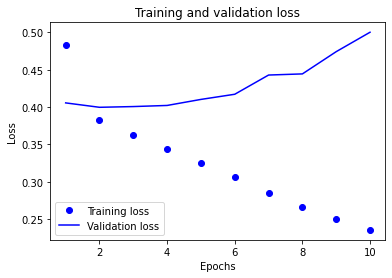

In [74]:
history_dict_birnn = history_birnn.history

import matplotlib.pyplot as plt

acc = history_dict_birnn['accuracy']
val_acc = history_dict_birnn['val_accuracy']
loss = history_dict_birnn['loss']
val_loss = history_dict_birnn['val_loss']

epochs = range(1, len(acc) + 1)

plt.plot(epochs, loss, 'bo', label = "Training loss")
                      # 파란색 점
plt.plot(epochs, val_loss, 'b', label = "Validation loss")
                      # 파란 실선
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

# 3번째 epoch 부터 validation loss 증가 

## Accuracy 시각화

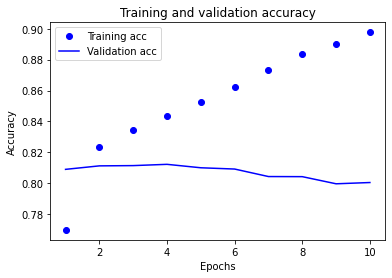

In [75]:
plt.clf()  #그림 초기화

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.show()

# 학습된 Embedding layer 분석

In [76]:
embedding_layer_birnn = model_birnn.layers[0]
weights_birnn = embedding_layer_birnn.get_weights()[0]
print(weights_birnn.shape)

# shape : (vocab_size, embedding_dim)

(10000, 200)


## 학습한 Embedding 파라미터를 파일에 써서 저장¶

In [77]:
word2vec_file_path_birnn = 'sentiment_classification/nsmc_BIRNN_parameters.txt'
f = open(word2vec_file_path_birnn, 'w')
f.write('{} {}\n'.format(vocab_size-4, word_vector_dim))  #몇 개의 벡터를 얼마 사이즈로 기재할 지 타이틀로 씀

#단어 개수(특수문자 4개는 제외)만큼의 워드 벡터를 파일에 기록
vectors_birnn = model_birnn.get_weights()[0]
for i in range(4, vocab_size):
    f.write('{} {}\n'.format(index_to_word[i], ' '.join(map(str, list(vectors_birnn[i, :])))))
f.close()

In [78]:
from gensim.models.keyedvectors import Word2VecKeyedVectors

word_vectors_birnn = Word2VecKeyedVectors.load_word2vec_format(word2vec_file_path_birnn, binary=False)

### 유사도 계산

In [79]:
word_vectors_birnn.similar_by_word('재밌')

[('재미있', 0.8653696775436401),
 ('지켜보', 0.8385486602783203),
 ('명작', 0.8361170291900635),
 ('안젤리나', 0.8300793170928955),
 ('즐거웠', 0.80290687084198),
 ('소박', 0.7951110005378723),
 ('통쾌', 0.7885086536407471),
 ('흥겨운', 0.7877150774002075),
 ('백제', 0.7858577370643616),
 ('화제', 0.783888578414917)]

# 한국어 Word2Vec 임베딩 활용하여 성능 개선

In [80]:
model_birnn_w = tf.keras.Sequential()
model_birnn_w.add(tf.keras.layers.Embedding(vocab_size, word_vector_dim, 
                                    embeddings_initializer=Constant(embedding_matrix),  
                                    input_length=maxlen, trainable=True))
model_birnn_w.add(tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(8)))
model_birnn_w.add(tf.keras.layers.Dense(1, activation='sigmoid'))

model_birnn_w.summary()

Model: "sequential_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_6 (Embedding)      (None, 41, 200)           2000000   
_________________________________________________________________
bidirectional_1 (Bidirection (None, 16)                13376     
_________________________________________________________________
dense_6 (Dense)              (None, 1)                 17        
Total params: 2,013,393
Trainable params: 2,013,393
Non-trainable params: 0
_________________________________________________________________


In [81]:
model_birnn_w.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [82]:
epochs = 10

model_birnn_w.fit(partial_X_train,
                  partial_y_train,
                  epochs=epochs,
                  batch_size=512,
                  validation_data=(X_val,y_val),
                  verbose=1)


Epoch 1/10
229/229 [==============================] - 5s 12ms/step - loss: 0.5688 - accuracy: 0.6966 - val_loss: 0.4660 - val_accuracy: 0.7840
Epoch 2/10
229/229 [==============================] - 2s 9ms/step - loss: 0.4271 - accuracy: 0.8033 - val_loss: 0.4192 - val_accuracy: 0.8015
Epoch 3/10
229/229 [==============================] - 2s 10ms/step - loss: 0.3841 - accuracy: 0.8258 - val_loss: 0.4045 - val_accuracy: 0.8099
Epoch 4/10
229/229 [==============================] - 2s 9ms/step - loss: 0.3641 - accuracy: 0.8358 - val_loss: 0.4028 - val_accuracy: 0.8130
Epoch 5/10
229/229 [==============================] - 2s 9ms/step - loss: 0.3484 - accuracy: 0.8433 - val_loss: 0.4096 - val_accuracy: 0.8096
Epoch 6/10
229/229 [==============================] - 2s 9ms/step - loss: 0.3374 - accuracy: 0.8497 - val_loss: 0.4066 - val_accuracy: 0.8154
Epoch 7/10
229/229 [==============================] - 2s 9ms/step - loss: 0.3267 - accuracy: 0.8541 - val_loss: 0.4112 - val_accuracy: 0.8134
Epoc

In [83]:
results_birnn_w = model_birnn_w.evaluate(X_test, y_test, verbose=2)
print(results_birnn_w)

1537/1537 - 4s - loss: 0.4348 - accuracy: 0.8048
[0.434822142124176, 0.8048090934753418]


한국어 word2vec을 활용했을 때 순방향, 역방향 신경망보다 더 큰 성능 향상이 이루어졌다.

# 1-D Convolution Neural Network(1-D CNN)
- 문장 전체를 한꺼번에 한 방향으로 길이 7짜리 필터로 스캐닝 하면서 7단어 이내에서 발견되는 특징을 추출하여 그것으로 문장을 분류하는 방식
- CNN 계열은 RNN 계열보다 병렬처리가 효율적이기 때문에 학습 속도도 훨씬 빠르게 진행

# 모델 설계 및 학습

In [84]:
model_cnn = tf.keras.Sequential()
model_cnn.add(tf.keras.layers.Embedding(vocab_size, word_vector_dim, input_shape=(None,)))
model_cnn.add(tf.keras.layers.Conv1D(16, 7, activation='relu'))
model_cnn.add(tf.keras.layers.MaxPooling1D(5))
model_cnn.add(tf.keras.layers.Conv1D(16, 7, activation='relu'))
model_cnn.add(tf.keras.layers.GlobalMaxPooling1D())
model_cnn.add(tf.keras.layers.Dense(8, activation='relu'))
model_cnn.add(tf.keras.layers.Dense(1, activation='sigmoid'))  # 최종 출력은 긍정/부정을 나타내는 1dim

model_cnn.summary()

Model: "sequential_7"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_7 (Embedding)      (None, None, 200)         2000000   
_________________________________________________________________
conv1d (Conv1D)              (None, None, 16)          22416     
_________________________________________________________________
max_pooling1d (MaxPooling1D) (None, None, 16)          0         
_________________________________________________________________
conv1d_1 (Conv1D)            (None, None, 16)          1808      
_________________________________________________________________
global_max_pooling1d (Global (None, 16)                0         
_________________________________________________________________
dense_7 (Dense)              (None, 8)                 136       
_________________________________________________________________
dense_8 (Dense)              (None, 1)                

In [85]:
model_cnn.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [86]:
epochs = 10

history_cnn = model_cnn.fit(partial_X_train,
                   partial_y_train,
                   epochs=epochs,
                   batch_size=512,
                   validation_data=(X_val,y_val),
                   verbose=1)

Epoch 1/10
229/229 [==============================] - 14s 8ms/step - loss: 0.4926 - accuracy: 0.7502 - val_loss: 0.3996 - val_accuracy: 0.8124
Epoch 2/10
229/229 [==============================] - 1s 6ms/step - loss: 0.3728 - accuracy: 0.8296 - val_loss: 0.3940 - val_accuracy: 0.8161
Epoch 3/10
229/229 [==============================] - 1s 6ms/step - loss: 0.3371 - accuracy: 0.8492 - val_loss: 0.3991 - val_accuracy: 0.8139
Epoch 4/10
229/229 [==============================] - 1s 6ms/step - loss: 0.2948 - accuracy: 0.8716 - val_loss: 0.4179 - val_accuracy: 0.8131
Epoch 5/10
229/229 [==============================] - 1s 7ms/step - loss: 0.2421 - accuracy: 0.8992 - val_loss: 0.4549 - val_accuracy: 0.8047
Epoch 6/10
229/229 [==============================] - 1s 6ms/step - loss: 0.1894 - accuracy: 0.9224 - val_loss: 0.5101 - val_accuracy: 0.7980
Epoch 7/10
229/229 [==============================] - 1s 6ms/step - loss: 0.1513 - accuracy: 0.9372 - val_loss: 0.5712 - val_accuracy: 0.7913
Epoch

In [87]:
print(max(history_cnn.history['val_accuracy']))

0.8160828948020935


## Test set 평가

In [88]:
results_cnn = model_cnn.evaluate(X_test, y_test, verbose=2)
print(results_cnn)

1537/1537 - 3s - loss: 0.7775 - accuracy: 0.7826
[0.7775394916534424, 0.7825741767883301]


사실 순방향 신경망보다 더 성능이 좋을 것이라고 예상했는데 의외로 제일 낮은 성능을 보였다.

## Loss, Accuracy 시각화

## Loss 시각화

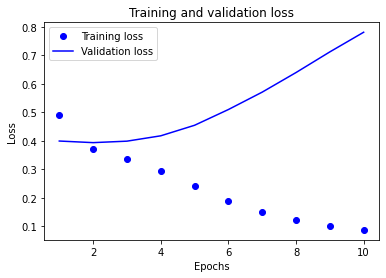

In [89]:
history_dict_cnn = history_cnn.history

import matplotlib.pyplot as plt

acc = history_dict_cnn['accuracy']
val_acc = history_dict_cnn['val_accuracy']
loss = history_dict_cnn['loss']
val_loss = history_dict_cnn['val_loss']

epochs = range(1, len(acc) + 1)

plt.plot(epochs, loss, 'bo', label = "Training loss")
                      # 파란색 점
plt.plot(epochs, val_loss, 'b', label = "Validation loss")
                      # 파란 실선
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

# 3번째 epoch 부터 validation loss 증가 

## Accuracy 시각화

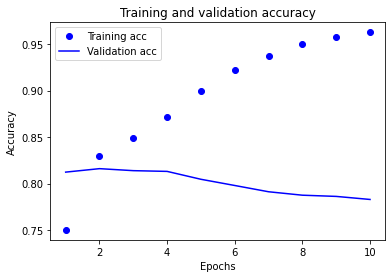

In [90]:
plt.clf()  #그림 초기화

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.show()

# 학습된 Embedding layer 분석

In [91]:
embedding_layer_cnn = model_cnn.layers[0]
weights_cnn = embedding_layer_cnn.get_weights()[0]
print(weights_cnn.shape)

# shape : (vocab_size, embedding_dim)

(10000, 200)


## 학습한 Embedding 파라미터를 파일에 써서 저장

In [92]:
word2vec_file_path_cnn = 'sentiment_classification/nsmc_CNN_parameters.txt'
f = open(word2vec_file_path_cnn, 'w')
f.write('{} {}\n'.format(vocab_size-4, word_vector_dim))  #몇 개의 벡터를 얼마 사이즈로 기재할 지 타이틀로 씀

#단어 개수(특수문자 4개는 제외)만큼의 워드 벡터를 파일에 기록
vectors_cnn = model_cnn.get_weights()[0]
for i in range(4, vocab_size):
    f.write('{} {}\n'.format(index_to_word[i], ' '.join(map(str, list(vectors_cnn[i, :])))))
f.close()

In [102]:
from gensim.models.keyedvectors import Word2VecKeyedVectors

word_vectors_cnn = Word2VecKeyedVectors.load_word2vec_format(word2vec_file_path_cnn, binary=False)
#word_vectors에 원하는 단어를 넣으면 vector값 반환

### 유사도 계산

In [94]:
word_vectors_cnn.similar_by_word('재밌')

[('담백', 0.6889824867248535),
 ('풍성', 0.6686931848526001),
 ('울림', 0.6608976125717163),
 ('냉혹', 0.6582479476928711),
 ('반함', 0.6569149494171143),
 ('보냅니다', 0.6552538871765137),
 ('진진', 0.654952883720398),
 ('흥미진진', 0.6530666947364807),
 ('비범', 0.6507084965705872),
 ('나위', 0.6478226184844971)]

# 한국어 Word2Vec 임베딩 활용하여 성능 개선

In [95]:
model_cnn_w = tf.keras.Sequential()
model_cnn_w.add(tf.keras.layers.Embedding(vocab_size, word_vector_dim, 
                                    embeddings_initializer=Constant(embedding_matrix),  # 카피한 임베딩을 여기서 활용
                                    input_length=maxlen, trainable=True))
model_cnn_w.add(tf.keras.layers.Conv1D(16, 7, activation='relu'))
model_cnn_w.add(tf.keras.layers.MaxPooling1D(5))
model_cnn_w.add(tf.keras.layers.Conv1D(16, 7, activation='relu'))
model_cnn_w.add(tf.keras.layers.GlobalMaxPooling1D())
model_cnn_w.add(tf.keras.layers.Dense(8, activation='relu'))
model_cnn_w.add(tf.keras.layers.Dense(1, activation='sigmoid'))  # 최종 출력은 긍정/부정을 나타내는 1dim

model_cnn_w.summary()

Model: "sequential_8"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_8 (Embedding)      (None, 41, 200)           2000000   
_________________________________________________________________
conv1d_2 (Conv1D)            (None, 35, 16)            22416     
_________________________________________________________________
max_pooling1d_1 (MaxPooling1 (None, 7, 16)             0         
_________________________________________________________________
conv1d_3 (Conv1D)            (None, 1, 16)             1808      
_________________________________________________________________
global_max_pooling1d_1 (Glob (None, 16)                0         
_________________________________________________________________
dense_9 (Dense)              (None, 8)                 136       
_________________________________________________________________
dense_10 (Dense)             (None, 1)                

In [96]:
model_cnn_w.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [97]:
epochs = 10

model_cnn.fit(partial_X_train,
              partial_y_train,
              epochs=epochs,
              batch_size=512,
              validation_data=(X_val,y_val),
              verbose=1)

Epoch 1/10
229/229 [==============================] - 2s 7ms/step - loss: 0.0787 - accuracy: 0.9651 - val_loss: 0.8359 - val_accuracy: 0.7807
Epoch 2/10
229/229 [==============================] - 1s 6ms/step - loss: 0.0715 - accuracy: 0.9681 - val_loss: 0.9092 - val_accuracy: 0.7815
Epoch 3/10
229/229 [==============================] - 1s 6ms/step - loss: 0.0661 - accuracy: 0.9697 - val_loss: 0.9694 - val_accuracy: 0.7780
Epoch 4/10
229/229 [==============================] - 1s 7ms/step - loss: 0.0626 - accuracy: 0.9714 - val_loss: 0.9871 - val_accuracy: 0.7754
Epoch 5/10
229/229 [==============================] - 1s 6ms/step - loss: 0.0593 - accuracy: 0.9718 - val_loss: 1.0294 - val_accuracy: 0.7754
Epoch 6/10
229/229 [==============================] - 1s 6ms/step - loss: 0.0569 - accuracy: 0.9732 - val_loss: 1.0616 - val_accuracy: 0.7784
Epoch 7/10
229/229 [==============================] - 1s 6ms/step - loss: 0.0549 - accuracy: 0.9738 - val_loss: 1.1186 - val_accuracy: 0.7754
Epoch 

In [98]:
results_cnn_w = model_cnn_w.evaluate(X_test, y_test, verbose=1)
print(results_cnn_w)

1537/1537 [==============================] - 3s 2ms/step - loss: 0.8173 - accuracy: 0.4971
[0.8172841668128967, 0.4970604479312897]


accuracy와 loss의 순서가 바뀐 줄 알았다.

위의 세 모델(순방향, 역방향, 양방향 신경망)은 word2vec을 사용했을 때 성능의 변화가 아주 소소했는데

너무 큰 폭으로 저하되었다.

# 회고

## 시도

1)

예시코드에 나와있던 load_data 함수를 실행했을 때, 

word_to_index에 특수문자와 의미를 파악하기 힘든 길이 1의 글자들이 많이 존재하는 것을 확인했다. 

이를 보정하기 위해, **정규표현식을 사용하여 특수문자와 단순 자음, 모음을 삭제하는 함수**를 만들어 words에 적용했고, 

for문을 사용해 **2글자 이상의 토큰만 취급**하는 words_list를 생성하였다.

2)

LMS에서 진행한 신경망 외에 양방향 신경망과 역방향 신경망을 추가해서 학습을 진행했다.

특별히 성능이 탁월한 모델은 없었다. 

다양한 모델을 사용해보았다는 것에 의미를 두려 한다.

## 궁금한 점 

1)

보정하기 전의 word_to_index 의 첫 번째 값은 공백도 아닌 '' 값이다.

왜 생성되었는지, 왜 정규표현식(\s)에 의해서 삭제되지 않았는 지 궁금하다. 

2)

한국어 워드임베딩을 CNN에 적용했을 때 급격한 성능 저하가 일어났다.

처음엔 코드가 잘못된 줄 알고 계속 뜯어 보았는데 그렇지 않았다.

왜 이런 성능이 도출되었는 지 궁금하다.

3) 

konlpy외에도 형태소 분석을 함에 있어 kiwi나 stanza라는 모듈이 있다고 알고 있다.

추후에 감성분석나 자연어 분석 프로젝트를 하게 되면 다른 모듈들 또한 활용해보고 싶다.